In [60]:
#BÀI món ăn

In [61]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [66]:
path = "/content/drive/MyDrive/Mon_an"

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  


In [68]:
train_gen = train_data_gen.flow_from_directory(path, target_size=(50,50), class_mode='categorical')      


Found 300 images belonging to 10 classes.


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten


In [70]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(50,50,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(252,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [71]:
history = model.fit(train_gen,batch_size=128,epochs=50,verbose=1,validation_data=(train_gen))


Epoch 1/50
10/10 [==============================] - 75s 7s/step - loss: 2.6016 - accuracy: 0.0800 - val_loss: 2.2873 - val_accuracy: 0.1733
Epoch 2/50
10/10 [==============================] - 1s 154ms/step - loss: 2.2905 - accuracy: 0.1133 - val_loss: 2.2355 - val_accuracy: 0.1467
Epoch 3/50
10/10 [==============================] - 2s 159ms/step - loss: 2.2189 - accuracy: 0.1800 - val_loss: 2.0451 - val_accuracy: 0.3267
Epoch 4/50
10/10 [==============================] - 1s 154ms/step - loss: 2.0257 - accuracy: 0.3033 - val_loss: 1.7960 - val_accuracy: 0.4467
Epoch 5/50
10/10 [==============================] - 2s 158ms/step - loss: 1.7956 - accuracy: 0.3800 - val_loss: 1.7287 - val_accuracy: 0.3400
Epoch 6/50
10/10 [==============================] - 2s 157ms/step - loss: 1.5612 - accuracy: 0.4400 - val_loss: 1.5222 - val_accuracy: 0.4900
Epoch 7/50
10/10 [==============================] - 2s 157ms/step - loss: 1.4324 - accuracy: 0.4800 - val_loss: 1.1620 - val_accuracy: 0.5833
Epoch 8/

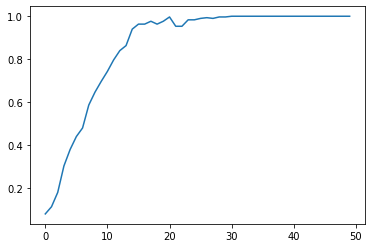

In [72]:
plt.plot(history.history['accuracy'])

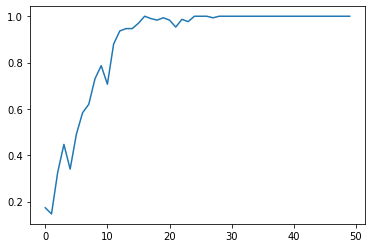

In [73]:
plt.plot(history.history['val_accuracy'])

In [74]:
model.save('mon_an.h5')

kết quả dự đoán


'Bánh mì'

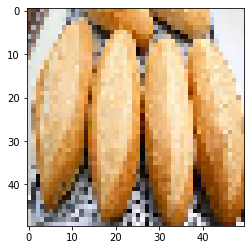

In [75]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
#load model
model= load_model('mon_an.h5')
from keras.preprocessing.image import load_img,img_to_array
#tạo dictionary
label= {0:'Bánh mì',
         1:'Bánh xèo',
         2:'Bún chả',
         3:'Bún riêu',
         4:'Chả giò',
         5:'Gỏi',
         6:'Gỏi cuốn',
         7:'phở',
         8:'thịtkho',
         9:'thịt nướng'}
#load ảnh resize 50x50
img= load_img('2.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

label[int(np.argmax(model.predict(img),axis=1))]



kết quả dự đoán


'Gỏi cuốn'

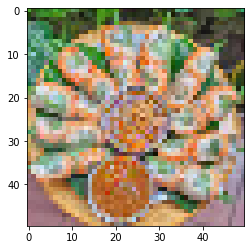

In [76]:
img= load_img('216.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'Chả giò'

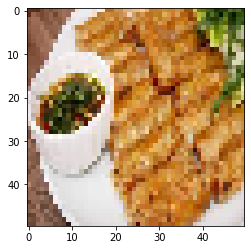

In [78]:
img= load_img('127.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'Bánh xèo'

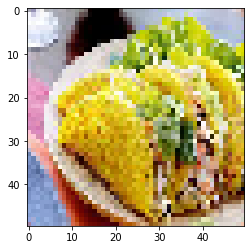

In [79]:
img= load_img('37.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]


kết quả dự đoán


'Bún riêu'

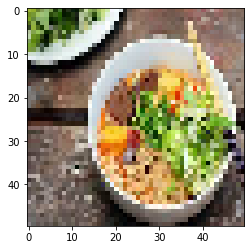

In [80]:
img= load_img('97.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'thịt nướng'

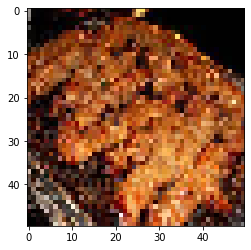

In [81]:
img= load_img('278.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'phở'

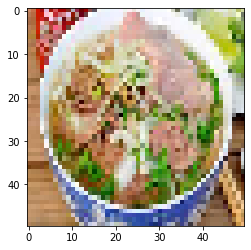

In [82]:
img= load_img('154.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'Bún chả'

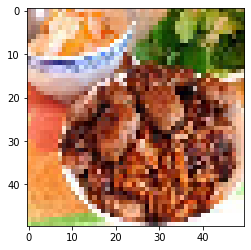

In [83]:
img= load_img('71.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'phở'

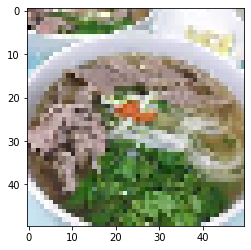

In [84]:
img= load_img('157.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]